In [1]:
import numpy as np
from pyclesperanto import Clesperanto

## Initialisation of device

Major difference with pyclesperanto-prototype approach is that we need to initialise the Clesperanto class.
This step is easily forgetable, would nice to be automatised if possible.

In [2]:
cle = Clesperanto()

Once instanciated, we can have acces to various properties and function get information on the device, the name, or also inquires about other possible available devices.

In [3]:
cle.info

[NVIDIA CUDA - NVIDIA GeForce GTX 1050 Ti]
	DevicedeviceType: 4
	MaxComputeUnits: 6
	MaxClockFrequency: 1455
	Version: OpenCL 3.0 CUDA
	Extensions: cl_khr_global_int32_base_atomics cl_khr_global_int32_extended_atomics cl_khr_local_int32_base_atomics cl_khr_local_int32_extended_atomics cl_khr_fp64 cl_khr_3d_image_writes cl_khr_byte_addressable_store cl_khr_icd cl_khr_gl_sharing cl_nv_compiler_options cl_nv_device_attribute_query cl_nv_pragma_unroll cl_nv_copy_opts cl_nv_create_buffer cl_khr_int64_base_atomics cl_khr_int64_extended_atomics cl_khr_device_uuid cl_khr_pci_bus_info
	GlobalMemorySizeInBytes: 4233035776
	LocalMemorySizeInBytes: 49152
	MaxMemoryAllocationSizeInBytes: 1058258944
	MaxWorkGroupSize: 1024



In [4]:
cle.list_available_devices()

['NVIDIA GeForce GTX 1050 Ti']

In [5]:
cle.name

NVIDIA GeForce GTX 1050 Ti


In [6]:
cle.score

4004233084928.0


Finally it is possible to select a specific device using a key string as input. Either with the `select_device()` methods or directly during the class instanciation.

In [7]:
cle.select_device("GTX")

'NVIDIA GeForce GTX 1050 Ti'

In [8]:
cle = Clesperanto("GTX")

## create, create_like, push, pull

The data manipulation can then be managed by those four methods.

In [9]:
numpy_array = np.random.rand(2,5,10)
print("numpy_array: ",type(numpy_array),numpy_array.shape,numpy_array.dtype)

numpy_array:  <class 'numpy.ndarray'> (2, 5, 10) float64


In [10]:
cle_buffer = cle.create(numpy_array.shape)
print("cle_buffer: ",type(cle_buffer), cle_buffer.shape(), cle_buffer.dtype(), cle_buffer.otype())
cle_buffer = cle.create(numpy_array.shape, otype="buffer")
print("cle_buffer: ",type(cle_buffer), cle_buffer.shape(), cle_buffer.dtype(), cle_buffer.otype())
cle_image = cle.create(numpy_array.shape, otype="image")
print("cle_image: ",type(cle_image), cle_image.shape(), cle_image.dtype(), cle_image.otype())

cle_buffer:  <class 'pyclesperanto._pyclesperanto.data'> [2, 5, 10] float buffer
cle_buffer:  <class 'pyclesperanto._pyclesperanto.data'> [2, 5, 10] float buffer
cle_image:  <class 'pyclesperanto._pyclesperanto.data'> [2, 5, 10] float image3d


In [11]:
cle_buffer = cle.push(numpy_array)
print("cle_buffer: ",type(cle_buffer), cle_buffer.shape(), cle_buffer.dtype(), cle_buffer.otype())
cle_buffer = cle.push(numpy_array, otype="buffer")
print("cle_buffer: ",type(cle_buffer), cle_buffer.shape(), cle_buffer.dtype(), cle_buffer.otype())
cle_image = cle.push(numpy_array, otype="image")
print("cle_image: ",type(cle_image), cle_image.shape(), cle_image.dtype(), cle_image.otype())

cle_buffer:  <class 'pyclesperanto._pyclesperanto.data'> [2, 5, 10] float buffer
cle_buffer:  <class 'pyclesperanto._pyclesperanto.data'> [2, 5, 10] float buffer
cle_image:  <class 'pyclesperanto._pyclesperanto.data'> [2, 5, 10] float image3d


In [12]:
cle_like_buffer = cle.create_like(cle_buffer)
print("cle_like_buffer: ",type(cle_like_buffer), cle_like_buffer.shape(), cle_like_buffer.dtype(), cle_like_buffer.otype())
cle_like_image = cle.create_like(cle_image)
print("cle_like_image: ",type(cle_like_image), cle_like_image.shape(), cle_like_image.dtype(), cle_like_image.otype())
cle_like_numpy = cle.create_like(numpy_array)
print("cle_like_numpy: ",type(cle_like_numpy), cle_like_numpy.shape(), cle_like_numpy.dtype(), cle_like_numpy.otype())

cle_like_buffer:  <class 'pyclesperanto._pyclesperanto.data'> [2, 5, 10] float buffer
cle_like_image:  <class 'pyclesperanto._pyclesperanto.data'> [2, 5, 10] float image3d
cle_like_numpy:  <class 'pyclesperanto._pyclesperanto.data'> [2, 5, 10] float buffer


In [13]:
output_numpy_arr = cle.pull(cle_buffer)
print("output_numpy_arr: ",type(output_numpy_arr), output_numpy_arr.shape, output_numpy_arr.dtype)
output_numpy_arr = cle.pull(cle_image)
print("output_numpy_arr: ",type(output_numpy_arr), output_numpy_arr.shape, output_numpy_arr.dtype)

output_numpy_arr:  <class 'numpy.ndarray'> (2, 5, 10) float32
output_numpy_arr:  <class 'numpy.ndarray'> (2, 5, 10) float32


For now, the interface only suport numpy.

## Call for kernel function

The class is also populated by function to apply kernel operation.

In [14]:
numpy_array = np.random.rand(2,5,10)
cle_buffer = cle.push(numpy_array, "buffer")
cle_output = cle.create(numpy_array.shape, "buffer")
cle.add_image_and_scalar(input_image=cle_buffer, output_image=cle_output, scalar=100)
output_array = cle.pull(cle_output)

This execution call can be simply.

First, it is possible to not provide the output and let the method return one automaticaly. In this case, this output is first create using the `create_like` method (see above). Hence if the output will of the same object type as the input object.

In [15]:
numpy_array = np.random.rand(2,5,10)
cle_buffer = cle.push(numpy_array, "buffer")
cle_output = cle.add_image_and_scalar(input_image=cle_buffer, scalar=100)
output_array = cle.pull(cle_output)

It is also possible to avoid the `push` operation as such:

In [16]:
numpy_array = np.random.rand(2,5,10)
cle_output = cle.add_image_and_scalar(input_image=numpy_array, scalar=100)
output_array = cle.pull(cle_output)

But it is important to know that by default, the object type used in those case will be `buffer`. From there we can create execution pipeline.

## Pipeline

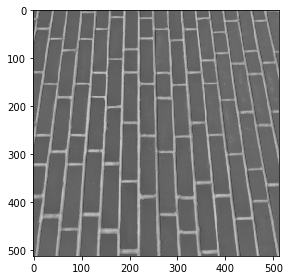

In [17]:
from skimage import data
from skimage.io import imshow

image = data.brick()
imshow(image)

/home/stephane/Libraries/anaconda3/envs/opencl/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


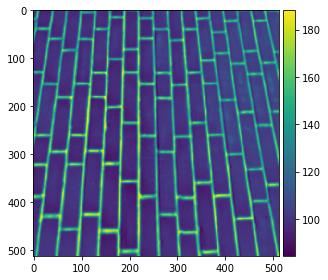

In [18]:
sigma = 1.5
blurred = cle.gaussian_blur(input_image=image, sigma_x=sigma, sigma_y=sigma)
imshow(cle.pull(blurred))

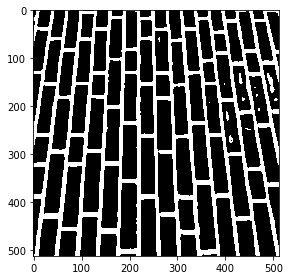

In [19]:
binary = cle.greater_or_equal_constant(input_image=blurred, scalar=110)
imshow(cle.pull(binary))

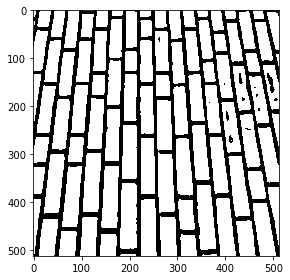

In [20]:
inverted = cle.binary_not(input_image=binary)
imshow(cle.pull(inverted))

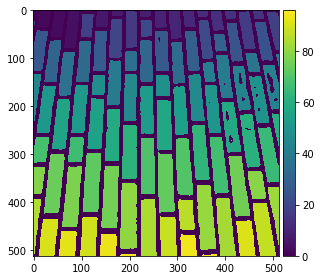

In [21]:
labelled = cle.connected_components_labeling_box(input_image=inverted)
imshow(cle.pull(labelled))